### SVM practical usage
* ***Dataset used*** : NBA fresher STATS
* ***AIM*** : To find weather fresher's career length >=5 or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nba_data.csv')
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
data.drop('Name',axis=1,inplace=True)
data['3P%'].fillna(data['3P%'].mean(),inplace=True)
data.shape

(1340, 20)

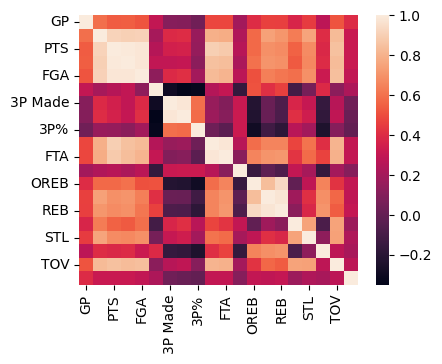

In [4]:
import seaborn as snb
crr = data.corr()

plt.figure(figsize=(4.5,3.5))
snb.heatmap(crr)
plt.show()

There are indeed some highly correlated feature so either of the corr. Feature can be dropped to reduce dimensionality and processing power requirements (which can further be increased{if needed} using kernel trick)

In [5]:
def drop_corr_feature(df,threshold):
    corr_feature = set()
    crr = df.corr()
    for i in range(len(crr)):
        for j in range(i):
            if crr.iloc[i,j] >= threshold:
                corr_feature.add(crr.columns[i])
    return corr_feature      

In [6]:
corr_features = drop_corr_feature(data,0.8)
data.drop(corr_features,axis=1,inplace=True)
data.shape
# 9 feature dropped 

(1340, 11)

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data.drop('TARGET_5Yrs',axis=1),
                                                       data['TARGET_5Yrs'],test_size=0.25,
                                                       random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

model = SVC()

grid = {
    'kernel' : ['rbf','poly'],
    'C' : [0.01,0.1,1,2,3,4,5,6,7,8,9,10],
    'degree' : [1,2,3,4,5,6,7,8],
    'gamma' : [0.01,0.05,0.1,0.5,1]
}

X_train_scaled = StandardScaler().fit_transform(X_train)

RSCV = RandomizedSearchCV(model,grid,n_iter=50,n_jobs=-1,verbose=3,).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [20]:
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',SVC())
])
#C=2, degree=1, gamma=0.1, kernel='rbf')
classifier.fit(X_train,y_train)
print('Trained 👍')

Trained 👍


In [21]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
print(f'accuracy% = {accuracy_score(y_test,y_pred)*100}%')

accuracy% = 70.74626865671641%
